In [1]:
path = "/content/drive/MyDrive/practice folder/brain tumor/archive/brain_tumor_1500"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import shutil
import glob

In [4]:
#count no of images of each class 0 is infeected and 1 is not
#root_dir = "/content/drive/MyDrive/practice folder/brain tumor/archive/brain_tumor_1500" #location of file orignal data set   
# since we have done upper part so many time we have made seprate folder for train ,test and , val in drive  that is belove link

root_dir = "/content/drive/MyDrive/practice folder/brain tumor/train"
number_of_images = {}
# will give you location of files available
for dir in os.listdir(root_dir):
  number_of_images[dir] = len(os.listdir(os.path.join(root_dir,dir)))
   
number_of_images.items()


dict_items([('brain_tumer_yes', 1045), ('brain_tumer_no', 1045)])

In [5]:
os.listdir("/content/drive/MyDrive/practice folder/brain tumor/")

['archive',
 'train',
 'val',
 'test',
 'bestmodel_tumor.h5',
 'brain tumor_2_.ipynb',
 'bestmodel_tumor_mobilenet.h5']

In [6]:
# # now data spliting task 
# if not os.path.exists("./train"):
#   os.mkdir("./train")

#   for dir in os.listdir(root_dir):
#     os.makedirs("./train"+dir)

#     for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dir)) , 
#                                 size = (math.floor(70/100*number_of_images[dir])-5),
#                                 replace = False)
#     o = os.path.join(root_dir,dir,img) #path
#     d = os.path.join("./train",dir)
#     shutil.copy(o,d)
#     os.remove(o)
# else:
#   print("the folder existed ")

In [7]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
      os.mkdir("/content/drive/MyDrive/practice folder/brain tumor/"+p)

  for dir in os.listdir(root_dir):
    os.makedirs("/content/drive/MyDrive/practice folder/brain tumor/"+p+"/"+dir)

    for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dir)) , 
                                size = (math.floor(split*number_of_images[dir])-5),
                                replace = False):
      o = os.path.join(root_dir,dir,img) #path
      d = os.path.join("/content/drive/MyDrive/practice folder/brain tumor/"+p,dir)
      shutil.copy(o,d)
      os.remove(o)
  else:
    print(f"{p}the folder existed ")


In [ ]:
dataFolder("train",0.7)

In [ ]:
dataFolder("val",0.15)


In [ ]:
dataFolder("test",0.15)

In [ ]:
## moodel building 

In [8]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# cnn model
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size = (3,3),activation='relu',input_shape=(224,224,3) ))

model.add(Conv2D(filters = 36,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy,metrics= ['accuracy'])

In [9]:
#data generator
def preprocessingImages1(path):
  """
  input :path
  output: pre processed image 
  """

  image_data = ImageDataGenerator(zoom_range= 0.2,shear_range=0.2,rescale=1/255,horizontal_flip= True)
  image = image_data.flow_from_directory(directory  = path,target_size = (224,224),batch_size = 32,class_mode = 'binary')
  
  return image

In [10]:
path = "/content/drive/MyDrive/practice folder/brain tumor/train"
train_data = preprocessingImages1(path)


Found 2090 images belonging to 2 classes.


In [11]:
def preprocessingImages2(path):
  """
  input :path
  output: pre processed image 
  """

  image_data = ImageDataGenerator(rescale=1/255)# we are not adding any perameter because at run time we might encounter with any image
  image = image_data.flow_from_directory(directory  = path,target_size = (224,224),batch_size = 32,class_mode = 'binary')
  
  return image

In [12]:
path = "/content/drive/MyDrive/practice folder/brain tumor/test"
test_data = preprocessingImages2(path)
path = "/content/drive/MyDrive/practice folder/brain tumor/val"
val_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [ ]:
# for early stoping and check point 
# because result comes early some time so we can save rest of time
from keras.callbacks import ModelCheckpoint,EarlyStopping

#early stoping 
es = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01,patience = 5,verbose = 1, mode = "auto")

#model check point 
mc = ModelCheckpoint(monitor = "val_accuracy",filepath = "./bestmodel_tumor.h5",verbose = 1,save_best_only = True, mode = "auto")

cd = [es,mc]

In [ ]:
## model training 
hs = model.fit_generator(generator= train_data,
                         steps_per_epoch = 10,
                         epochs = 50,verbose = 1,
                         validation_data=val_data,
                         callbacks=cd)
#verbos is use to not show process , and on validation is just rescaling, not augmentation

In [ ]:
# model graphical visulization
h = hs.history
h.keys()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],c = "red")
plt.title("acc vs val_accuracy")
plt.show()

plt.plot(h["loss"])
plt.plot(h["val_loss"],c = "red")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
# model accuracy 
from keras.models import load_model

In [ ]:
model = load_model("/content/drive/MyDrive/practice folder/brain tumor/bestmodel_tumor.h5")


In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy of model is {acc*100} %")

In [ ]:
from keras.preprocessing.image import load_img,img_to_array

path = "/content/drive/MyDrive/practice folder/brain tumor/test/brain_tumer_no/no100.jpg"

img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()
input_arr.shape # now it is same as input layer 
#but we have first dimension as none that we need to update

input_arr = np.expand_dims(input_arr,axis = 0)
input_arr.shape
# pred = model.predict_classes(input_arr)[0][0]
# pred # this is not work above tensore flow 2.5.0

### workde ok till this point 
predict = model.predict(input_arr) 
print(predict)
if predict > 0.5:
  print("yes is tumorous brain")
else:
  print("no it is not tumorous brain ")

In [ ]:
train_data.class_indices # will show which class hold which no

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
______________________________________________________________________________________________________________________

In [ ]:
__________________________________________________________________________________________________________________

In [ ]:
## model training /transfer learning
#from keras.application.mobilenet import MobileNet

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet,preprocess_input


In [14]:
# we need to recscle the image before we make any process which is done by preprocessFunction1 in last model wherewe 
#just divide our image by 255, but here we will update and use "preprocess_input" and rest of will be same andmake new functiion so it can't overlap 
#with old data function 

#data generator
def preprocessingImages11(path):
  """
  input :path
  output: pre processed image 
  """

  image_data = ImageDataGenerator(zoom_range= 0.2,shear_range=0.2,preprocessing_function = preprocess_input ,horizontal_flip= True)
  image = image_data.flow_from_directory(directory  = path,target_size = (224,224),batch_size = 32,class_mode = 'binary')
  
  return image
def preprocessingImages22(path):
  """
  input :path
  output: pre processed image 
  """

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)# we are not adding any perameter because at run time we might encounter with any image
  image = image_data.flow_from_directory(directory  = path,target_size = (224,224),batch_size = 32,class_mode = 'binary')
  
  return image


In [15]:
base_model = MobileNet(input_shape = (224,223,3),include_top = False)

17235968/17225924 [==============================] - 0s 0us/step


In [16]:
for layer in base_model.layers:
  layer.trainable = False



In [17]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 223, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [18]:
x = Flatten()(base_model.output)# in both dense and flatten methos two ()() represent function and second represent input  of that variable
x = Dense(units=1,activation='sigmoid')(x)# here x is our variable 

model = Model(base_model.input,x)# here it is our input  and output  using functional api which is store in Model 

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 223, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [20]:
model.compile(optimizer='rmsprop',loss = keras.losses.binary_crossentropy,metrics=['accuracy'])

In [21]:
## callbacks and cheack points 
# because result comes early some time so we can save rest of time
from keras.callbacks import ModelCheckpoint,EarlyStopping

#early stoping 
ES = EarlyStopping(monitor = "val_accuracy",min_delta = 0.01,patience = 5,verbose = 1, mode = "auto")

#model check point 
MC = ModelCheckpoint(monitor = "val_accuracy",filepath = "/content/drive/MyDrive/practice folder/brain tumor/bestmodel_tumor_mobilenet.h5",verbose = 1,save_best_only = True)

CD = [ES,MC]

In [22]:
hist = model.fit_generator(generator= train_data,
                         steps_per_epoch = 10,
                         epochs = 50,verbose = 1,
                         validation_data=val_data,
                         callbacks=CD)
                          

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 7.8346 - accuracy: 0.5500 
Epoch 00001: val_accuracy improved from -inf to 0.89545, saving model to /content/drive/MyDrive/practice folder/brain tumor/bestmodel_tumor_mobilenet.h5
10/10 [==============================] - 346s 37s/step - loss: 7.8346 - accuracy: 0.5500 - val_loss: 0.5559 - val_accuracy: 0.8955
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.9062 
Epoch 00002: val_accuracy did not improve from 0.89545
10/10 [==============================] - 129s 13s/step - loss: 0.6245 - accuracy: 0.9062 - val_loss: 2.3268 - val_accuracy: 0.6614
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.9731 - accuracy: 0.7969 
Epoch 00003: val_accuracy improved from 0.89545 to 0.95000, saving model to /content/drive/MyDrive/practice folder/brain tumor/bestmodel_tumor_mobilenet.h5
10/10 [==============================] - 116s 12s/step - loss: 1.9731 - accuracy: 0.7969 

In [25]:
# model graphical visulization
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

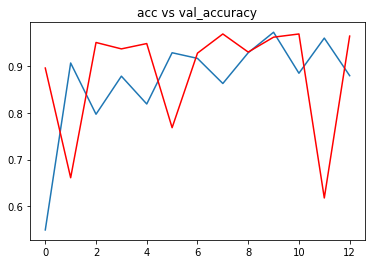

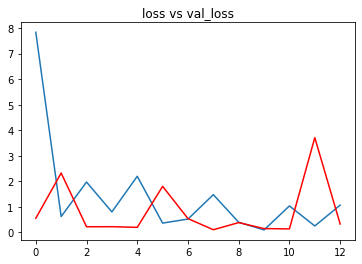

In [26]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],c = "red")
plt.title("acc vs val_accuracy")
plt.show()

plt.plot(h["loss"])
plt.plot(h["val_loss"],c = "red")
plt.title("loss vs val_loss")
plt.show()

In [27]:
# load model and find accuracy
model = load_model("/content/drive/MyDrive/practice folder/brain tumor/bestmodel_tumor_mobilenet.h5")

In [28]:
train_data.class_indices # will show which class hold which no

{'brain_tumer_no': 0, 'brain_tumer_yes': 1}

In [31]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy of model is {acc*100} %")

the accuracy of model is 96.13636136054993 %


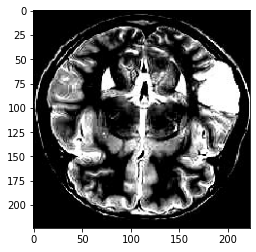

[[0.9999802]]
0.999980
yes it is tumorous brain


In [49]:
from keras.preprocessing.image import load_img,img_to_array

path = "/content/drive/MyDrive/practice folder/brain tumor/val/brain_tumer_yes/y14.jpg"

img = load_img(path,target_size=(224,223))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()
input_arr.shape # now it is same as input layer 
#but we have first dimension as none that we need to update

input_arr = np.expand_dims(input_arr,axis = 0)
input_arr.shape

# pred = model.predict_classes(input_arr)
# pred # this is not work above tensore flow 2.5.0

### workde ok till this point 
predict = model.predict(input_arr) 
print(predict)
print("{:f}".format(float(predict)))
if predict > 0.5:
  print("yes it is tumorous brain")
else:
  print("no it is not tumorous brain ")

In [39]:
import decimal

In [42]:
tmp = decimal.Decimal('8.99284722486562e-02')
tmp
x = 8.99284722486562e-02
print("{:f}".format(x))

0.089928
